In [1]:
import pandas as pd
from google.colab import files
uploaded=files.upload()

Saving FDF.xlsx to FDF.xlsx


In [2]:
import io
data=pd.read_excel(io.BytesIO(uploaded['FDF.xlsx']))
data

,username,name,tweet,hashtags,Jobs,embed,bio,main_Job,CLUSTERS,emojie,tweet_comb,pre_pro,No_emo,bio_new,hashtags_subs,pre_pro_RHRW,pre_pro_RH,pre_pro_RHW
0,GiGiHadid,Gigi Hadid,"['few things 😋🙃😘', 'You were facing the right ...",giforce,model,['model'],IMG Models Worldwide. #giforce,model,2,sparkles,"IMG Models Worldwide. #giforce ['few things ',...",img models worldwide thing face right way exac...,IMG Models Worldwide. #giforce,img models worldwide,giforce,img models worldwide thing face right way exac...,img models worldwide thing face right way exac...,img models worldwide thing face right way exac...
1,Cantguardmike,Michael William Thomas Jr.,"['Facts !', '@jhardee_19 called it like 2 mont...",gobucks,football wide receiver,['receiver'],GOD GOT US,footballer,3,NaN,"GOD GOT US ['Facts !', '@jhardee_19 called it ...",fact call like month ago congratulation get re...,GOD GOT US,NaN,gobucks,fact call like month ago congratulation get re...,fact call like month ago congratulation get re...,fact call like month ago congratulation get re...
2,IAMJHUD,Jennifer Hudson,"['Team JHud, please help me wish my Virgo sist...","neverforget,baobabstudios,respectmovie,ebony,v...","singer , actress","['singer', 'actress']","Grammy winning Artist, Academy Award winning A...",singer actress,4,sparkles,"Grammy winning Artist, Academy Award winning A...",grammy win artist academy award win actress ne...,"Grammy winning Artist, Academy Award winning A...",grammy win artist academy award win actress ne...,business twitter,grammy win artist academy award win actress ne...,grammy win artist academy award win actress ne...,grammy win artist academy award win actress ne...
3,lukajones,Luka Jones,"['@johnnypemberton Here we go 🏈', 'gracias for...","goclippers,rcjh,topcity,goblue,rcjh","actor , comedian","['actor', 'comedian']",actor (Shrill & People of Earth both on @hulu)...,actor comedian,6,baseball football basketball,actor (Shrill & People of Earth both on @hulu)...,actor thrill people earth philosophy reader ch...,actor (Shrill & People of Earth both on @hulu)...,actor thrill people earth philosophy reader ch...,thrill people,actor thrill people earth philosophy reader ch...,actor thrill people earth philosophy reader ch...,actor thrill people earth philosophy reader ch...
4,rcobb18,Randall Cobb (American football),['Man It Feels Good to Be a Packer https://t....,"mvp,ad,winitforted,jerseyswap,verzuz,ad,jersey...",football wide receiver,['receiver'],Faith in the Creator of Life. Husband. Father....,footballer,3,football,Faith in the Creator of Life. Husband. Father....,faith creator life husband father son brother ...,Faith in the Creator of Life. Husband. Father....,faith creator life husband father son brother ...,creator faith,faith creator life husband father son brother ...,faith creator life husband father son brother ...,faith creator life husband father son brother ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,ColinHanks,Colin Hanks,['@PFTompkins The old man has a pretty sweet c...,"hankskerchiefs,hankskerchiefs,beready,beready,tbt","actor , producer , director","['actor', 'producer']",NaN,actor producer,6,NaN,['@PFTompkins The old man has a pretty sweet ...,old man pretty sweet chariot right well play m...,NaN,NaN,official com,old man pretty sweet chariot right well play m...,old man pretty sweet chariot right well play m...,old man pretty sweet chariot right well play m...
1310,CraigyFerg,Craig Ferguson,['Tonight! @TheHustlerABC @ABCNetwork #thecrai...,"thecraigfergusonshow,thecraigfergusonshow,theh...","actor , author , comedian , television host","['actor', 'author']",NaN,actor author,1,NaN,['Tonight! @TheHustlerABC @ABCNetwork #thecra...,tonight thursday june season premiere miss sus...,NaN,NaN,instagram thehustler,tonight thursday june season premiere miss sus...,tonight thursday june season premiere miss sus...,tonight thursday june season premiere miss sus...
1311,GeraldFinley,Gerald Finley,['

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.tokenize import word_tokenize
import string
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

In [19]:
from keras.layers import  Dropout, Dense
from keras.models import Sequential
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn import metrics


def TFIDF(X_train, X_test,MAX_NB_WORDS=75000):
    vectorizer_x = TfidfVectorizer(max_features=MAX_NB_WORDS)
    X_train = vectorizer_x.fit_transform(X_train).toarray()
    X_test = vectorizer_x.transform(X_test).toarray()
    print("tf-idf with",str(np.array(X_train).shape[1]),"features")
    return (X_train,X_test)


def Build_Model_DNN_Text(shape, nClasses, dropout=0.5):
    """
    buildModel_DNN_Tex(shape, nClasses,dropout)
    Build Deep neural networks Model for text classification
    Shape is input feature space
    nClasses is number of classes
    """
    model = Sequential()
    node = 512 # number of nodes
    nLayers = 2 # number of  hidden layer

    model.add(Dense(node,input_dim=shape,activation='relu'))
    model.add(Dropout(dropout))
    for i in range(0,nLayers):
        model.add(Dense(node,input_dim=node,activation='relu'))
        model.add(Dropout(dropout))
    model.add(Dense(nClasses, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

X_train, X_test, y_train, y_test = train_test_split(data['pre_pro_RHRW'].to_list(),data['CLUSTERS'].values, test_size=0.15, random_state=42)
X_train_tfidf,X_test_tfidf = TFIDF(X_train,X_test)

model_DNN = Build_Model_DNN_Text(X_train_tfidf.shape[1], 9)
model_DNN.summary()
exit(1)
model_DNN.fit(X_train_tfidf, y_train,
                              validation_data=(X_test_tfidf, y_test),
                              epochs=15,
                              batch_size=128,
                              verbose=2)

predicted = model_DNN.predict(X_test_tfidf)
predicted = np.argmax(predicted, axis=1)

print(metrics.classification_report(y_test, predicted))

tf-idf with 20486 features
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 512)               10489344  
_________________________________________________________________
dropout_39 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_40 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_41 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_55 (Dense)          

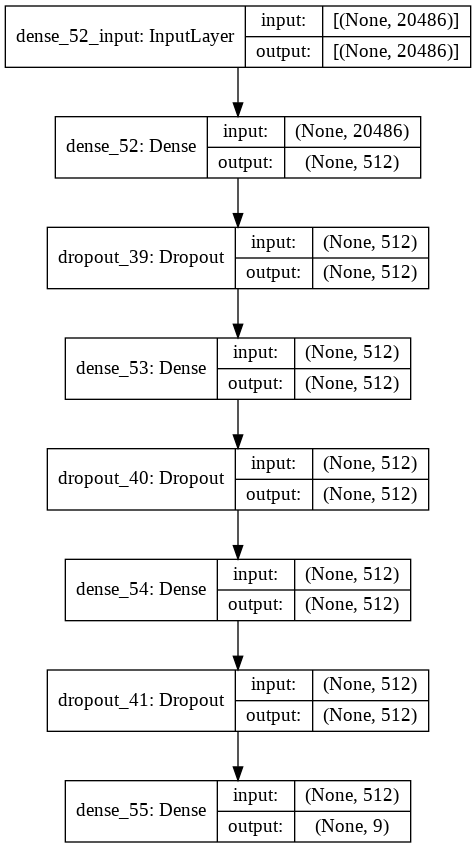

In [20]:
from keras.utils.vis_utils import plot_model
plot_model(model_DNN, to_file='model_DNN.png', show_shapes=True, show_layer_names=True)